# Scatter plots & Correlations

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from scipy.stats import pearsonr, spearmanr
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
font = { 'family': 'DejaVu Sans', 'weight': 'bold', 'size': 15 }
plt.rc('font', **font)

In [3]:
df = pd.read_csv('../data/data.csv')

In [4]:
df.head()

,IDIROID,YEAR,YR_NUM,TOTAL_YEARS,EARLY_TRANSFER,EARLY_CANX_LEFT,EARLY_CANX_DEFER,FEB_CANX_LEFT,FEB_CANX_DEFER,DAYS_TO_FIRST_REG,...,NUM_MAY_TYPE_A,NUM_MAY_TYPE_B,NUM_MAY_TYPE_C,NUM_MAY_TYPE_D,NUM_MAY_TYPE_E,NUM_MAY_TYPE_X,NUM_MAY_TYPE_S,EARLIEST_CRM_DATE,DAYS_TO_FIRST_CRM,PREV_NUM_CRM
0,239,2014,1,1,N,N,N,N,N,16,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,243,2014,1,1,N,N,N,N,N,14,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,926,2014,1,1,N,N,N,N,N,22,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,932,2016,1,1,N,N,N,N,N,27,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,946,2014,1,2,N,N,N,N,N,22,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
feature_names = list(df.drop("RESULT", 1).columns)

In [6]:
feature_names[:10]

['IDIROID',
 'YEAR',
 'YR_NUM',
 'TOTAL_YEARS',
 'EARLY_TRANSFER',
 'EARLY_CANX_LEFT',
 'EARLY_CANX_DEFER',
 'FEB_CANX_LEFT',
 'FEB_CANX_DEFER',
 'DAYS_TO_FIRST_REG']

In [7]:
subset = df[feature_names[:10]]

In [8]:
subset.head(2)

,IDIROID,YEAR,YR_NUM,TOTAL_YEARS,EARLY_TRANSFER,EARLY_CANX_LEFT,EARLY_CANX_DEFER,FEB_CANX_LEFT,FEB_CANX_DEFER,DAYS_TO_FIRST_REG
0,239,2014,1,1,N,N,N,N,N,16
1,243,2014,1,1,N,N,N,N,N,14


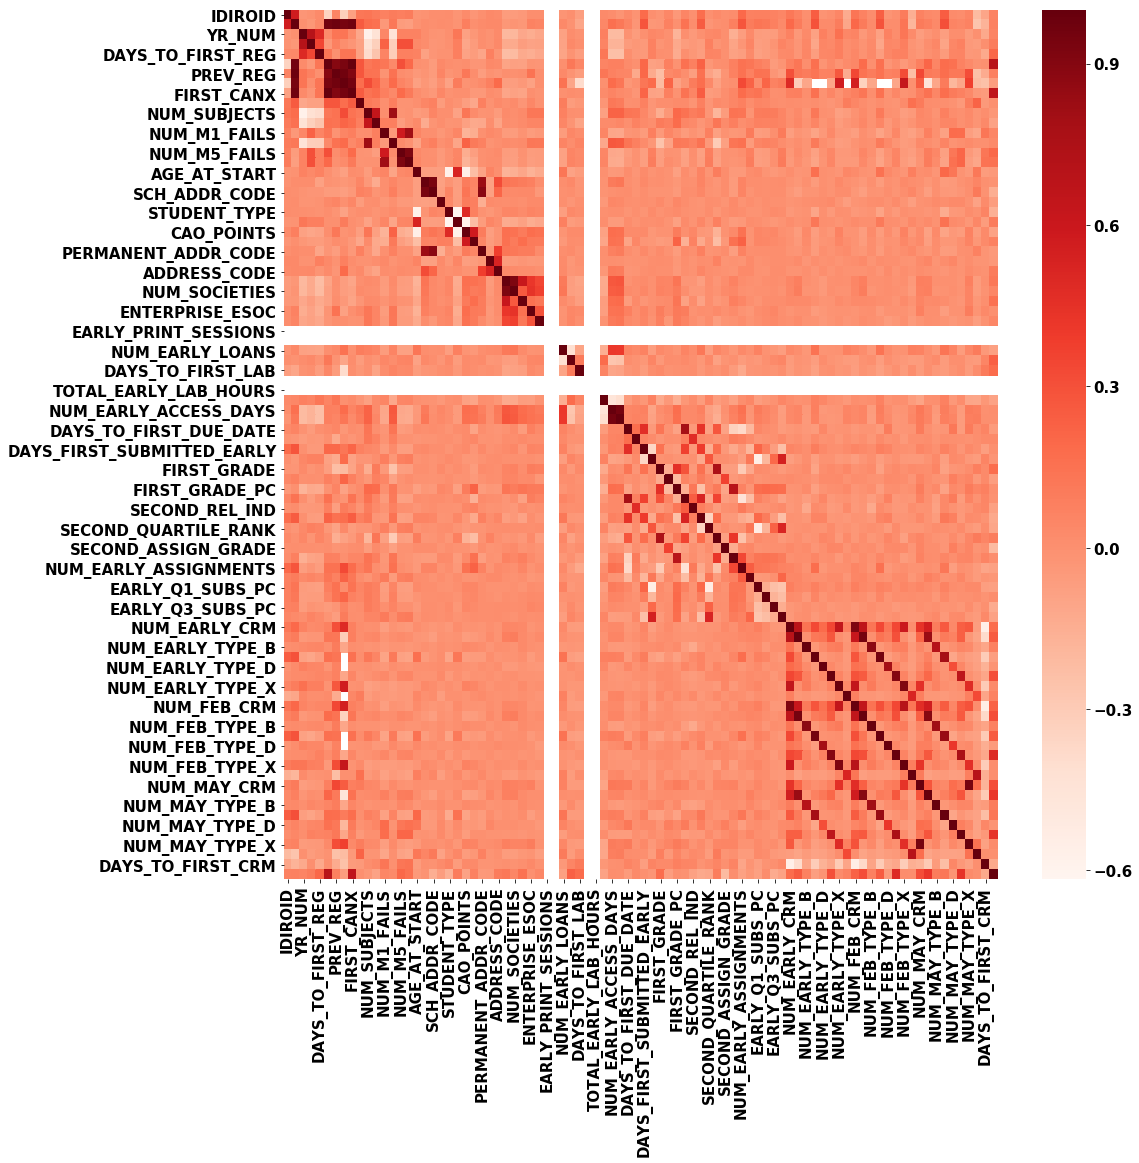

In [9]:
plt.figure(figsize=(16, 16))
cor = df.corr()
sns.heatmap(cor, annot=False, cmap=plt.cm.Reds)
plt.savefig('../figures/correlations.png', bbox_inches="tight")

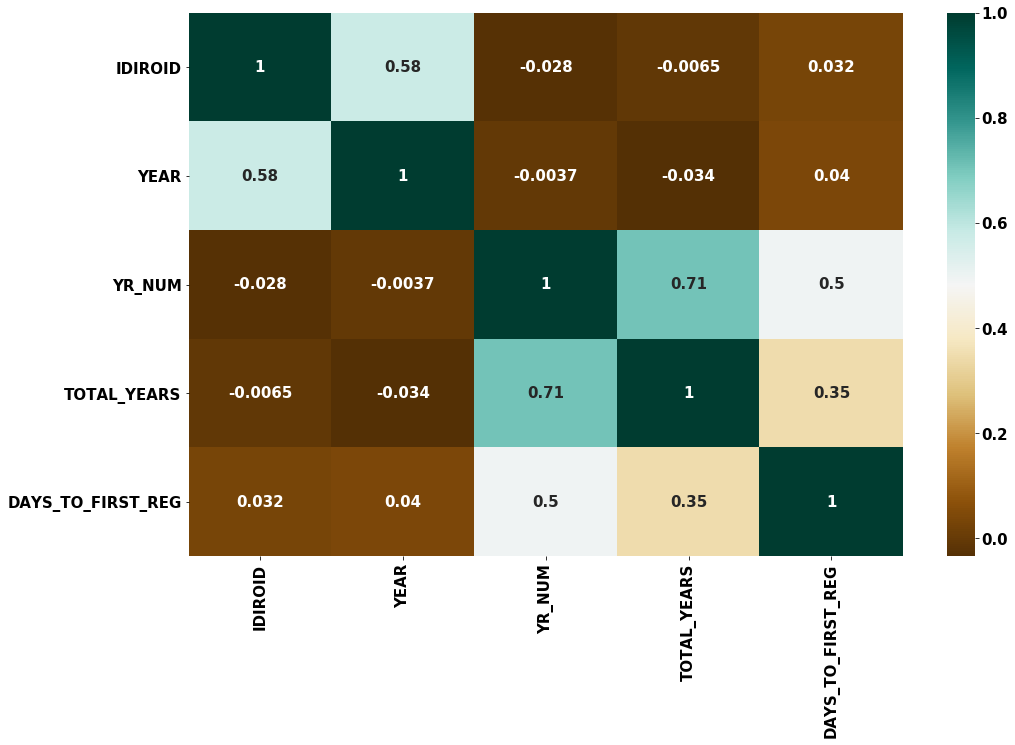

In [10]:
# subset features
plt.figure(figsize=(16, 10))
cor = subset.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.BrBG)
plt.savefig('../figures/corr_subset.png', bbox_inches="tight")

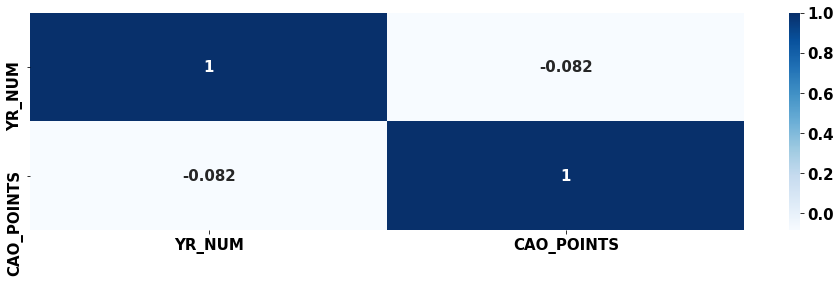

In [11]:
plt.figure(figsize=(16, 4))
cor = df[['YR_NUM', 'CAO_POINTS']].corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Blues)
plt.savefig('../figures/corr_YR_NUM_CAO_POINTS.png', bbox_inches="tight")

In [12]:
df[
    ['CAO_POINTS', 'FIRST_GRADE']
].corr() # method='pearson'

,CAO_POINTS,FIRST_GRADE
CAO_POINTS,1.000000,-0.008708
FIRST_GRADE,-0.008708,1.000000


In [13]:
df[
    ['CAO_POINTS', 'FIRST_GRADE']
].corr(method='spearman')

,CAO_POINTS,FIRST_GRADE
CAO_POINTS,1.00000,0.06951
FIRST_GRADE,0.06951,1.00000


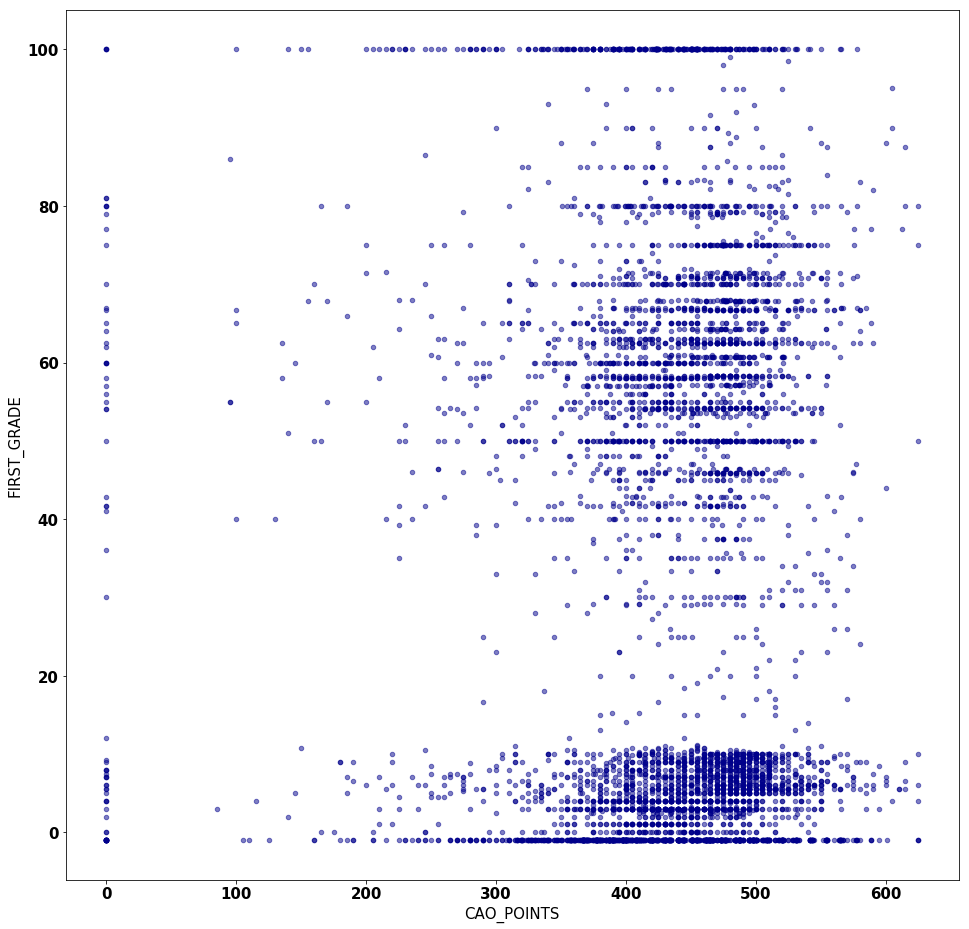

In [14]:
fig = df.plot.scatter(
    x='CAO_POINTS', 
    y='FIRST_GRADE', 
    c='DarkBlue', 
    alpha=0.5,
    figsize=(16, 16)
)

In [15]:
fig.get_figure().savefig('../figures/scatter_CAO_POINTS_FIRST_GRADE.png', bbox_inches="tight")

In [16]:
df[
    ['CAO_POINTS', 'FIRST_GRADE_PC']
].corr()

,CAO_POINTS,FIRST_GRADE_PC
CAO_POINTS,1.000000,0.099724
FIRST_GRADE_PC,0.099724,1.000000


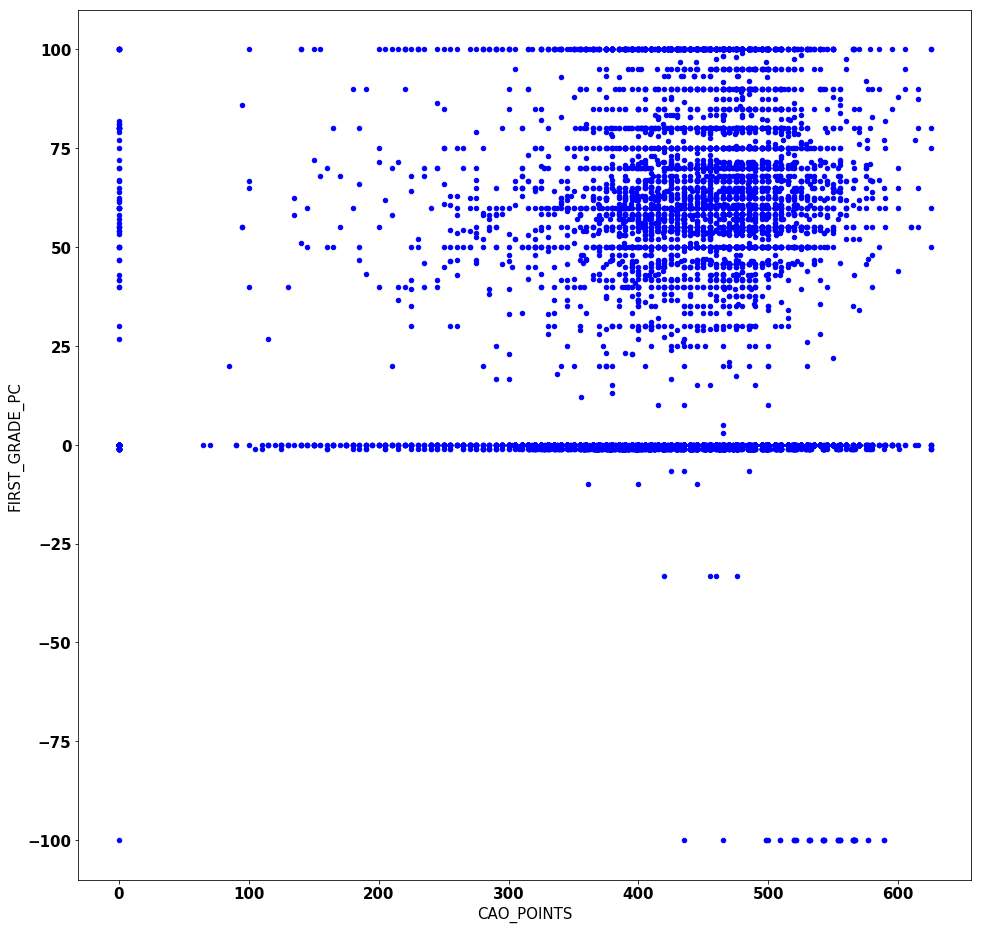

In [17]:
fig = df.plot.scatter(
    x='CAO_POINTS', 
    y='FIRST_GRADE_PC', 
    c='blue', 
    figsize=(16, 16)
)

In [18]:
fig.get_figure().savefig('../figures/scatter_CAO_POINTS_FIRST_GRADE_PC.png', bbox_inches="tight")

In [19]:
df[
    ['CAO_POINTS', 'SECOND_GRADE']
].corr()

,CAO_POINTS,SECOND_GRADE
CAO_POINTS,1.000000,-0.163651
SECOND_GRADE,-0.163651,1.000000


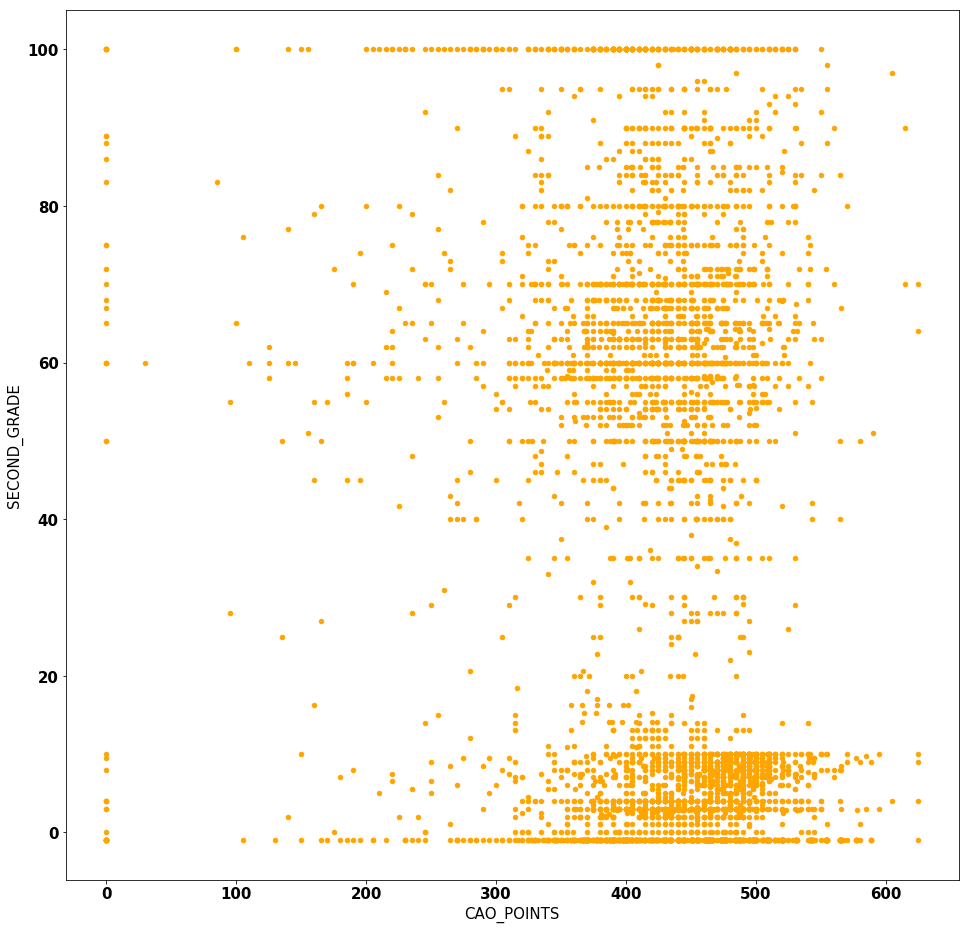

In [20]:
fig = df.plot.scatter(
    x='CAO_POINTS', 
    y='SECOND_GRADE', 
    c='orange', 
    figsize=(16, 16)
)

In [21]:
fig.get_figure().savefig('../figures/scatter_CAO_POINTS_SECOND_GRADE.png', bbox_inches="tight")

In [22]:
df[
    ['NUM_EARLY_ACCESS_DAYS', 'NUM_EARLY_ASSIGNMENTS']
].corr()

,NUM_EARLY_ACCESS_DAYS,NUM_EARLY_ASSIGNMENTS
NUM_EARLY_ACCESS_DAYS,1.00000,0.15943
NUM_EARLY_ASSIGNMENTS,0.15943,1.00000


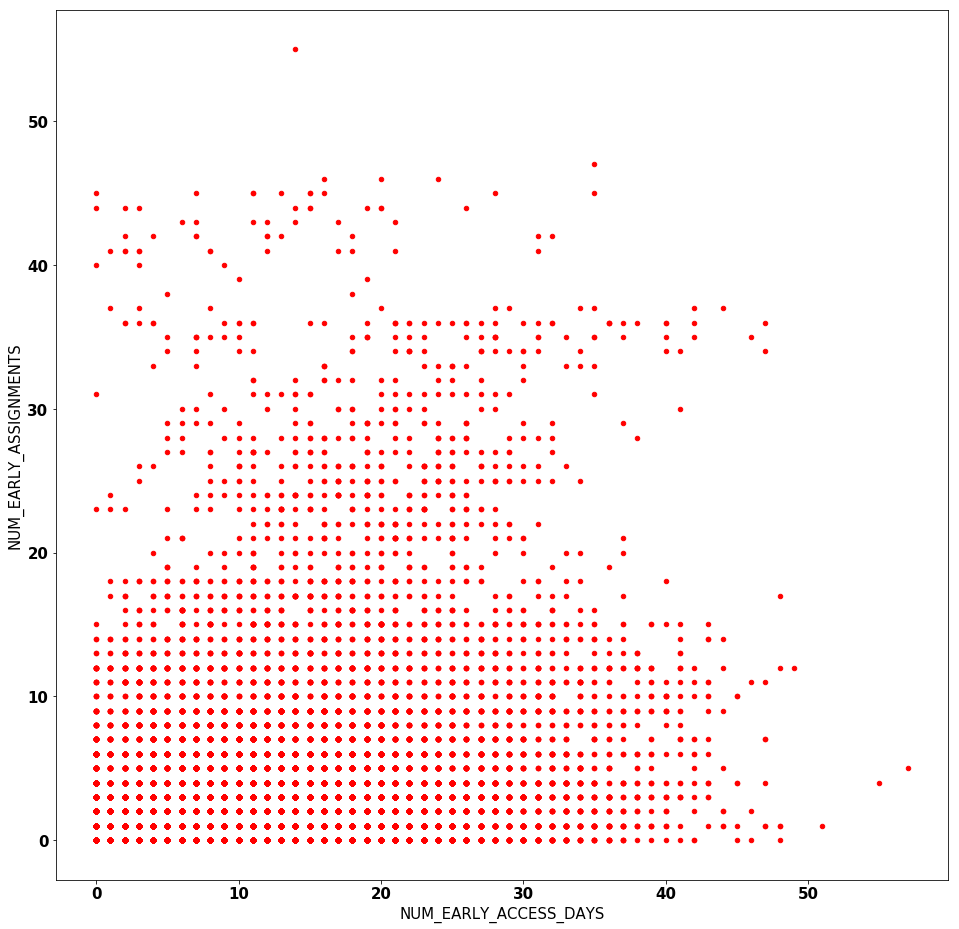

In [23]:
fig = df.plot.scatter(
    x='NUM_EARLY_ACCESS_DAYS', 
    y='NUM_EARLY_ASSIGNMENTS', 
    c='red', 
    figsize=(16, 16)
)

In [24]:
fig.get_figure().savefig('../figures/scatter_NUM_EARLY_ACCESS_DAYS_NUM_EARLY_ASSIGNMENTS.png', bbox_inches="tight")

In [25]:
df[
    ['NUM_EARLY_LOANS', 'NUM_EARLY_ACCESS_DAYS']
].corr()

,NUM_EARLY_LOANS,NUM_EARLY_ACCESS_DAYS
NUM_EARLY_LOANS,1.000000,0.413188
NUM_EARLY_ACCESS_DAYS,0.413188,1.000000


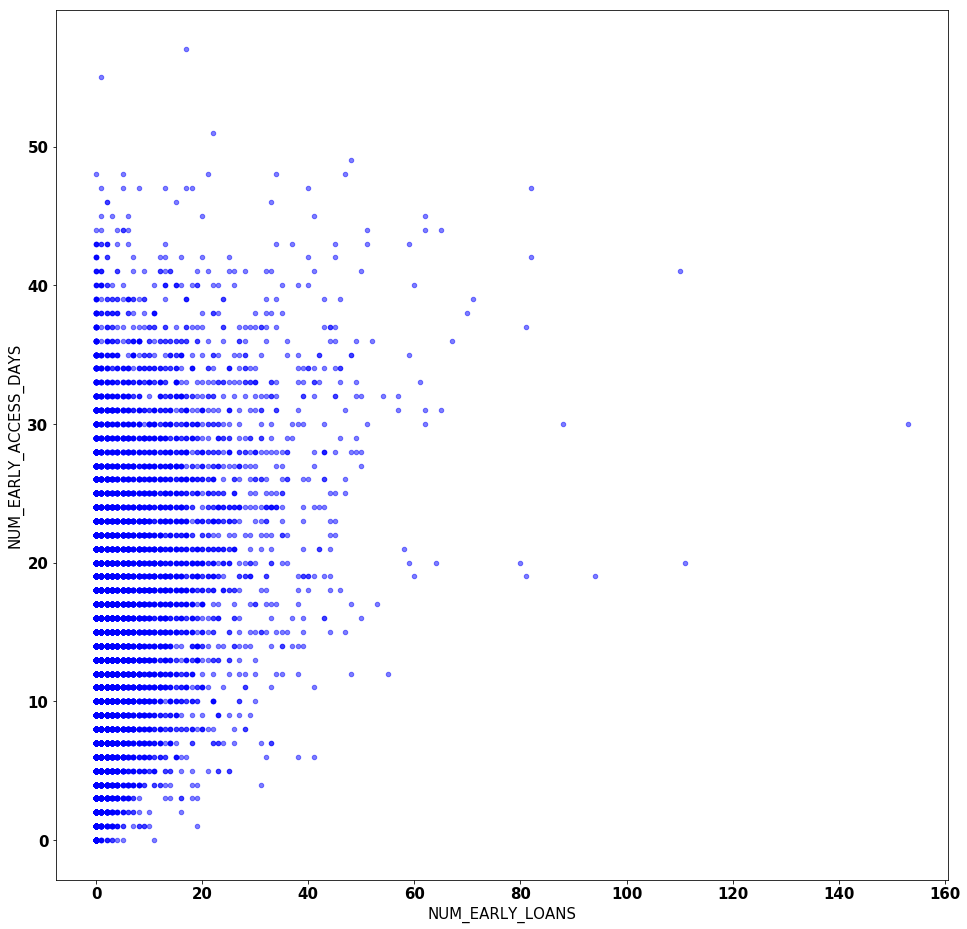

In [26]:
fig = df.plot.scatter(
    x='NUM_EARLY_LOANS', 
    y='NUM_EARLY_ACCESS_DAYS', 
    c='blue', 
    alpha=0.5,
    figsize=(16, 16)
)

In [27]:
fig.get_figure().savefig('../figures/scatter_NUM_EARLY_LOANS_NUM_EARLY_ACCESS_DAYS.png', bbox_inches="tight")

In [28]:
df[
    ['DAYS_TO_FIRST_LAB', 'DAYS_TO_FIRST_ACCESS']
].corr()

,DAYS_TO_FIRST_LAB,DAYS_TO_FIRST_ACCESS
DAYS_TO_FIRST_LAB,1.000000,0.065159
DAYS_TO_FIRST_ACCESS,0.065159,1.000000


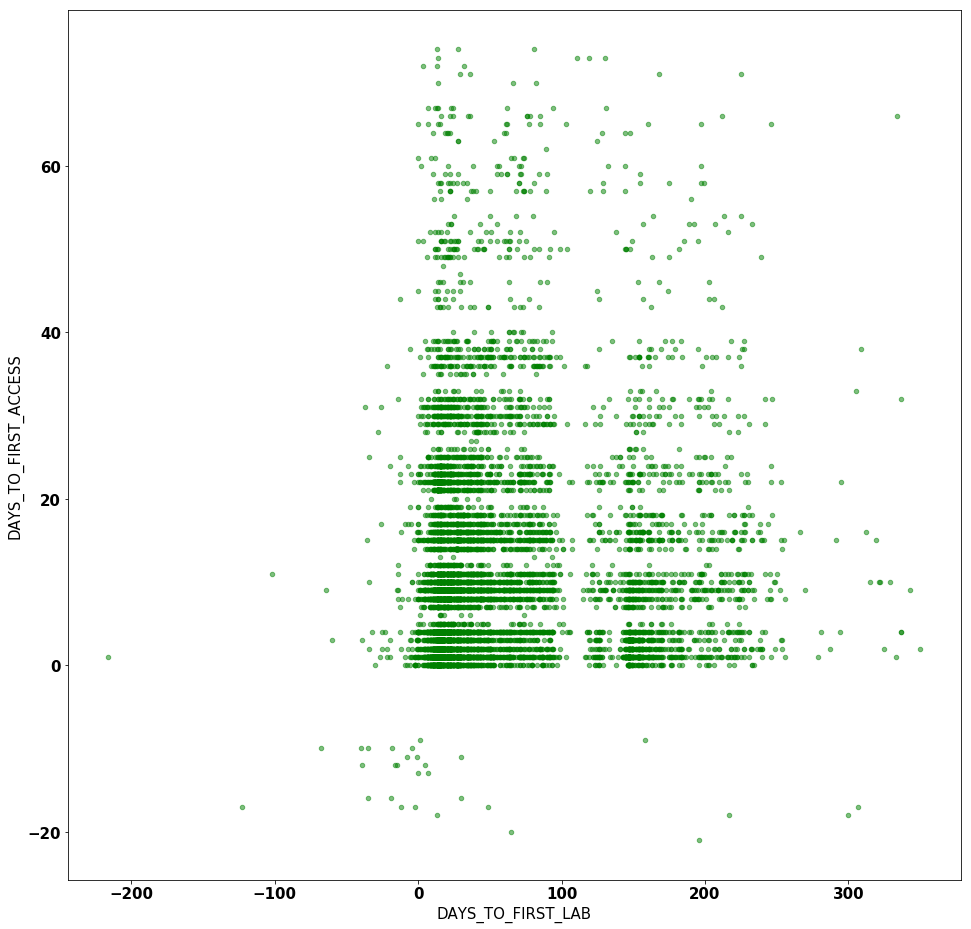

In [29]:
fig = df.plot.scatter(
    x='DAYS_TO_FIRST_LAB', 
    y='DAYS_TO_FIRST_ACCESS', 
    c='green', 
    alpha=0.5,
    figsize=(16, 16)
)

In [30]:
fig.get_figure().savefig('../figures/scatter_DAYS_TO_FIRST_LAB_DAYS_TO_FIRST_ACCESS.png', bbox_inches="tight")

In [31]:
df[
    ['NUM_EARLY_CRM', 'NUM_EARLY_LATES']
].corr()

,NUM_EARLY_CRM,NUM_EARLY_LATES
NUM_EARLY_CRM,1.000000,0.045086
NUM_EARLY_LATES,0.045086,1.000000


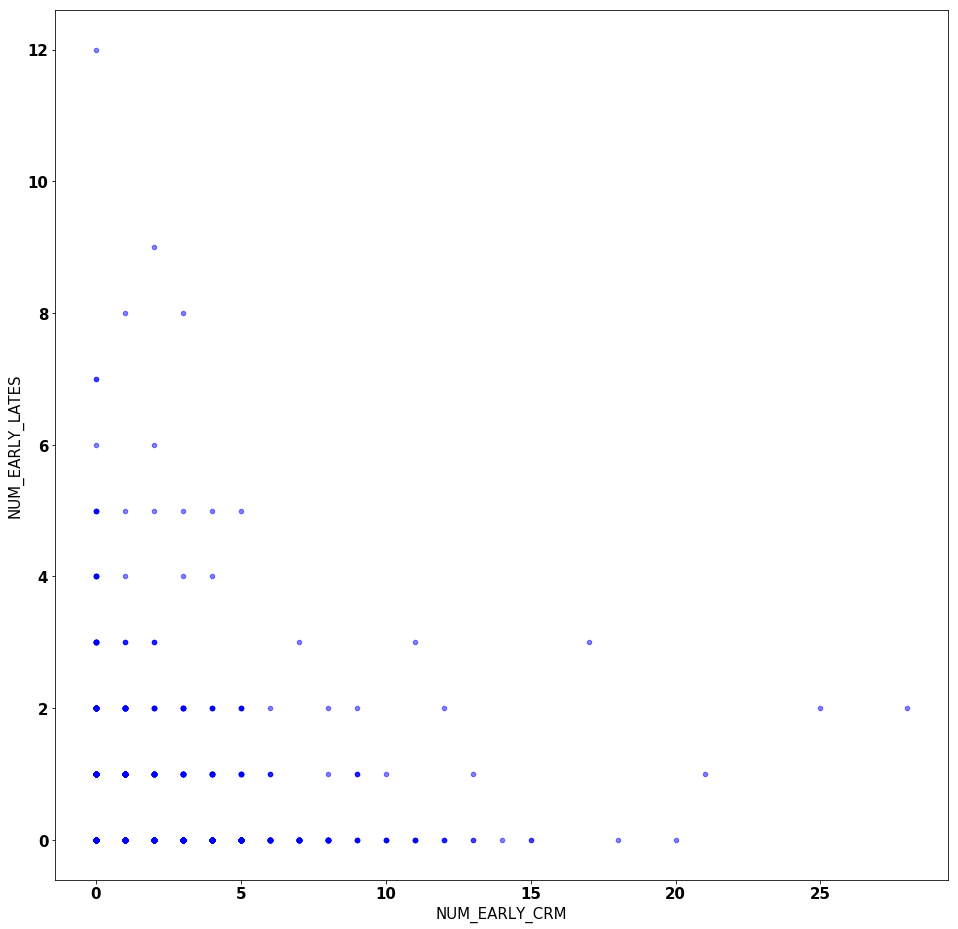

In [32]:
fig = df.plot.scatter(
    x='NUM_EARLY_CRM', 
    y='NUM_EARLY_LATES', 
    c='blue', 
    alpha=0.5,
    figsize=(16, 16)
)

In [33]:
fig.get_figure().savefig('../figures/scatter_NUM_EARLY_CRM_NUM_EARLY_LATES.png', bbox_inches="tight")

In [34]:
df[
    ['FIRST_GRADE', 'SECOND_GRADE']
].corr()

,FIRST_GRADE,SECOND_GRADE
FIRST_GRADE,1.000000,0.756963
SECOND_GRADE,0.756963,1.000000


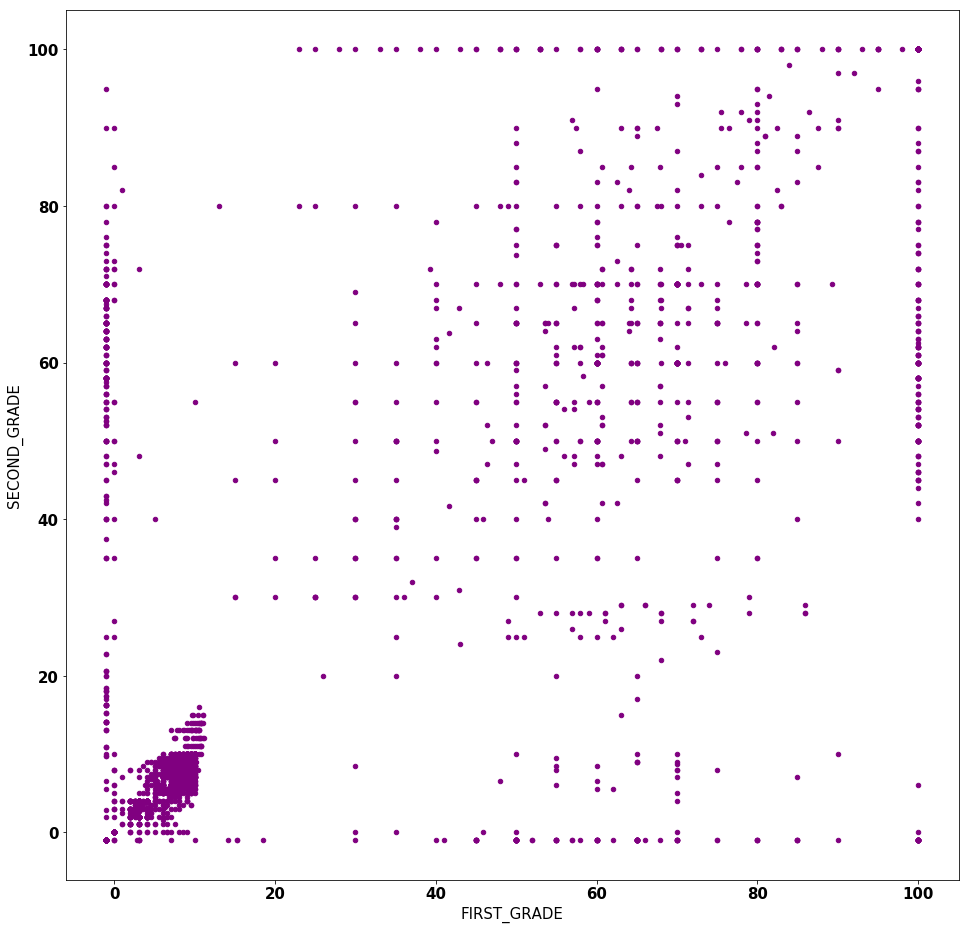

In [35]:
fig = df.plot.scatter(
    x='FIRST_GRADE', 
    y='SECOND_GRADE', 
    c='purple', 
    figsize=(16, 16)
)

In [36]:
fig.get_figure().savefig('../figures/scatter_FIRST_GRADE_SECOND_GRADE.png', bbox_inches="tight")

In [37]:
df[
    ['CAO_POINTS', 'LC_MATHS_POINTS']
].corr()

,CAO_POINTS,LC_MATHS_POINTS
CAO_POINTS,1.000000,0.579229
LC_MATHS_POINTS,0.579229,1.000000


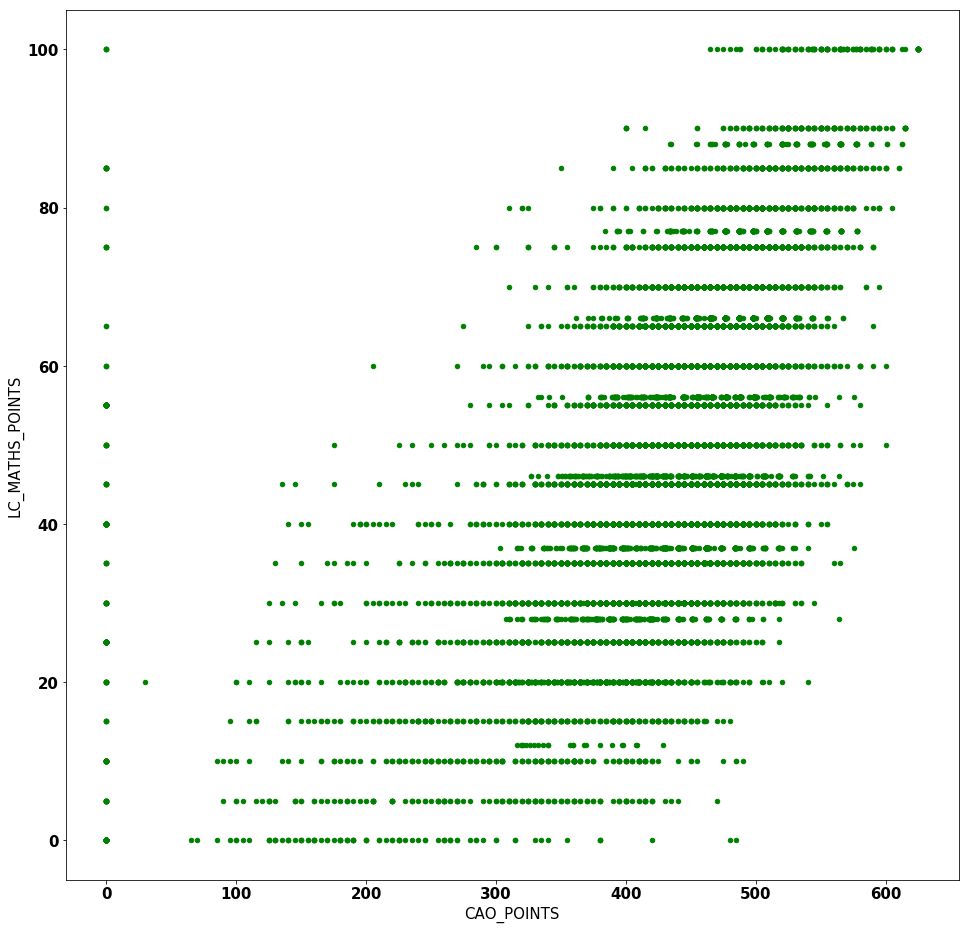

In [38]:
fig = df.plot.scatter(
    x='CAO_POINTS', 
    y='LC_MATHS_POINTS', 
    c='green', 
    figsize=(16, 16)
)

In [39]:
fig.get_figure().savefig('../figures/scatter_CAO_POINTS_LC_MATHS_POINTS.png', bbox_inches="tight")